Net(
  (fc1): Linear(in_features=1, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.6590],
        [ 0.2658],
        [-0.8278],
        [ 0.8628],
        [-0.3783],
        [ 0.2823],
        [-0.9566],
        [-0.2589],
        [ 0.2158],
        [ 0.3928],
        [ 0.3040],
        [-0.8188],
        [-0.6377],
        [-0.9207],
        [ 0.8561],
        [-0.6163],
        [ 0.4858],
        [-0.7575],
        [-0.8508],
        [-0.9746],
        [-0.0475],
        [ 0.4314],
        [ 0.3292],
        [ 0.1997],
        [ 0.8235],
        [ 0.1309],
        [ 0.7086],
        [ 0.4575],
        [ 0.1741],
        [ 0.9282],
        [-0.7622],
        [-0.7256],
        [ 0.4410],
        [-0.4317],
        [-0.5307],
        [-0.2330],
        [ 0.6051],
        [-0.1918],
        [ 0.7110],
        [ 0.0740],
        [ 0.4859],
        [ 0

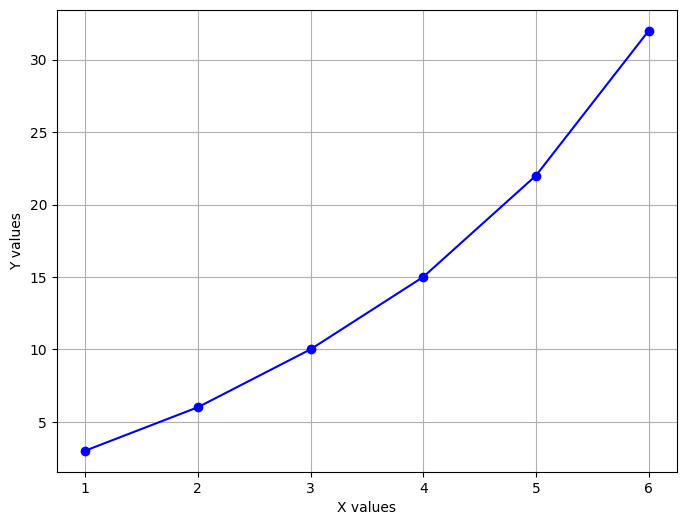

In [155]:
### Training with fancier version ###

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module): ## nn.Module class is used
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,120,bias=True)  # in dim, out dim
        self.fc2 = nn.Linear(120,50,bias=True)  # in dim, out dim
        self.fc3 = nn.Linear(50,1,bias=True)  # in dim, out dim
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        return x

net = Net()

print(net)
print(list(net.parameters())) # parameters are randomized


#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


optimizer = optim.Adam(net.parameters(), lr=5e-3, weight_decay=1e-4)
#optimizer = optim.Adam(net.parameters(), lr=0.1)


data = [(1.0,3.0), (2.0,6.0), (3.0,10.0), (4.0,15.0), (5.0,22.0), (6.0,32.0)]

# Split data into x and y
x_values, y_values = zip(*data)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

In [156]:
for epoch in range(500): # 0 - 19
    for i, current_data in enumerate(data):
        X, Y = current_data
        X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
        optimizer.zero_grad()   
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
    #print("Epoch {} - loss: {}".format(epoch, loss))
    if epoch%100 == 99:
        print("Epoch {} - loss: {}".format(epoch, loss))

### Test the trained network ###            
for i, current_data in enumerate(data):
    X, Y = current_data
    X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])  
    out = net(torch.FloatTensor(X))  
    print("when x = {}, y = {}".format(X, out))
    

Epoch 99 - loss: 6.516326427459717
Epoch 199 - loss: 0.007180814165621996
Epoch 299 - loss: 0.0029649101197719574
Epoch 399 - loss: 0.10595056414604187
Epoch 499 - loss: 1.8339051166549325e-08
when x = tensor([1.]), y = tensor([2.9990], grad_fn=<ViewBackward0>)
when x = tensor([2.]), y = tensor([6.0008], grad_fn=<ViewBackward0>)
when x = tensor([3.]), y = tensor([9.9989], grad_fn=<ViewBackward0>)
when x = tensor([4.]), y = tensor([15.0004], grad_fn=<ViewBackward0>)
when x = tensor([5.]), y = tensor([22.0003], grad_fn=<ViewBackward0>)
when x = tensor([6.]), y = tensor([31.9998], grad_fn=<ViewBackward0>)


In [157]:
X

tensor([6.])

In [158]:
for epoch in range(20):
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [159]:
W = torch.tensor([1.0], requires_grad=True)
W = W*2
label = 1.0
loss = W*5 - label 
loss.backward()
W.grad

/var/folders/_5/727fvmnd5yd54mwrh313s9600000gn/T/ipykernel_28882/353321738.py:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  W.grad
